In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent = dataset[['age', 'sex_male', 'bmi', 'children', 'smoker_yes']]

dependent = dataset[['charges']]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [7]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random',max_features='log2')
regressor=regressor.fit(x_train,y_train)

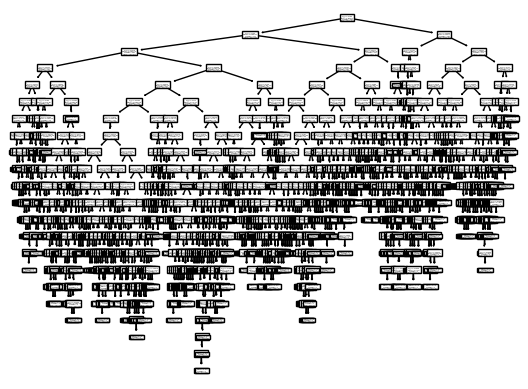

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [9]:
y_pred=regressor.predict(x_test)

In [10]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [11]:
r_score

0.7187035029754638